### Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib import colors
from matplotlib.colors import ListedColormap
from IPython.display import HTML
#import mpld3
import warnings
np.set_num_threads = 1
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing Wine Dataset 

In [4]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Distributions of each dataset feature:

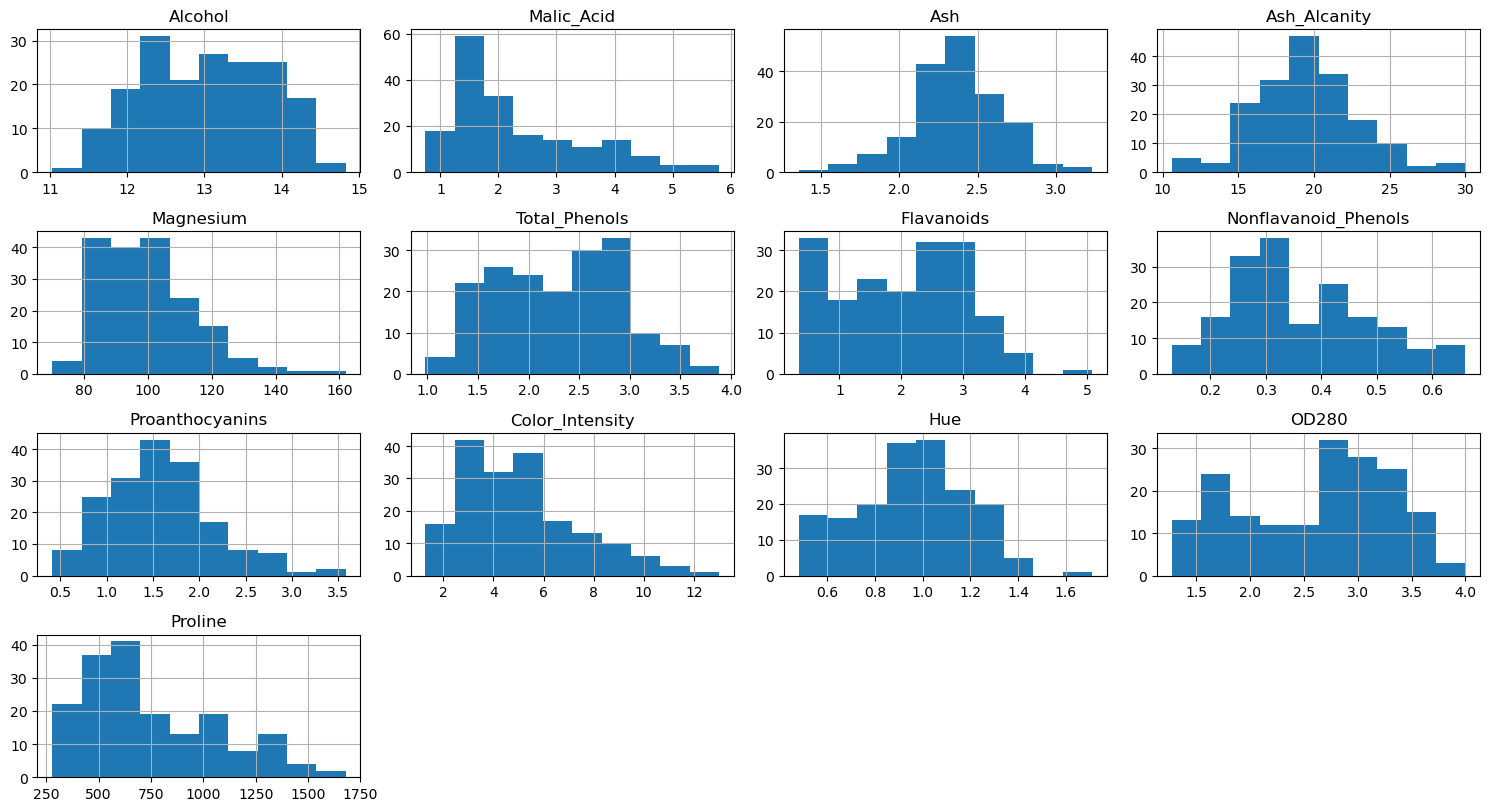

In [9]:
df.hist(layout = (5, 4), figsize = (15, 10), bins = 10)
plt.tight_layout()
plt.show()

#### Boxplots of each feature.
PCA is sensitive to outliers, and none were observed.

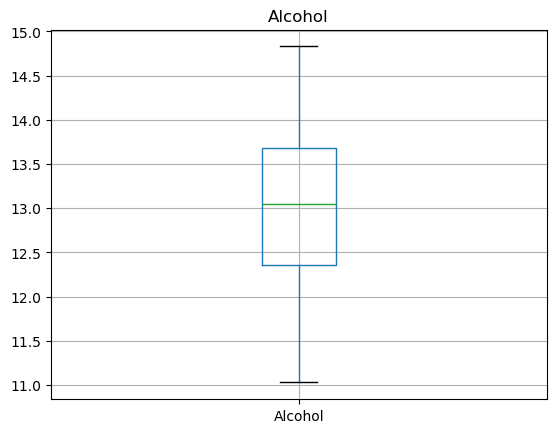

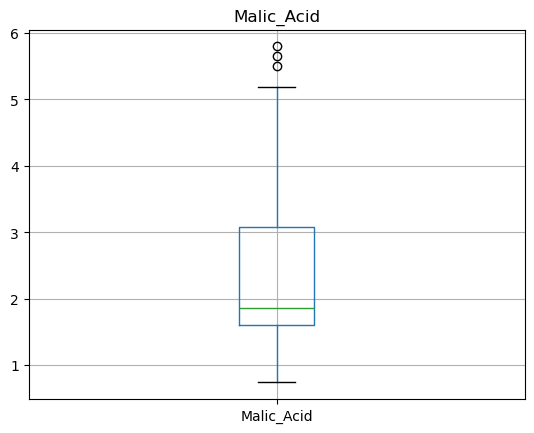

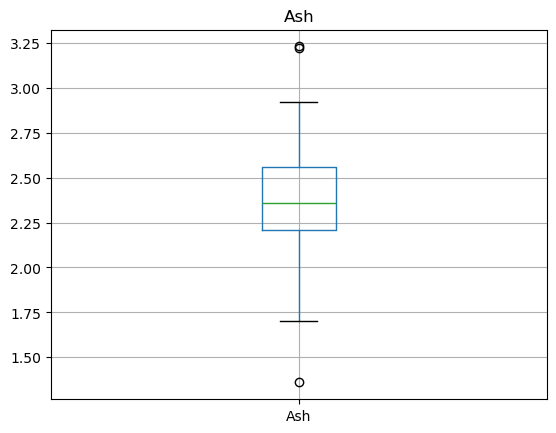

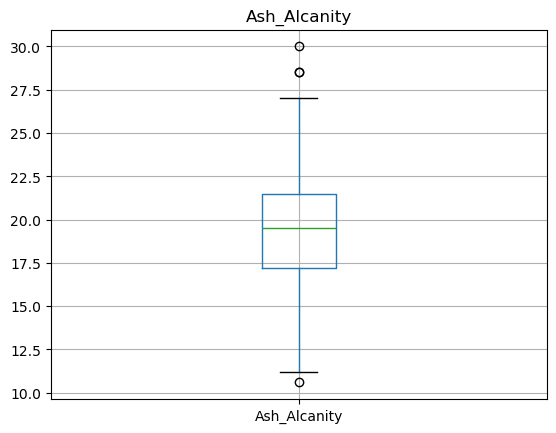

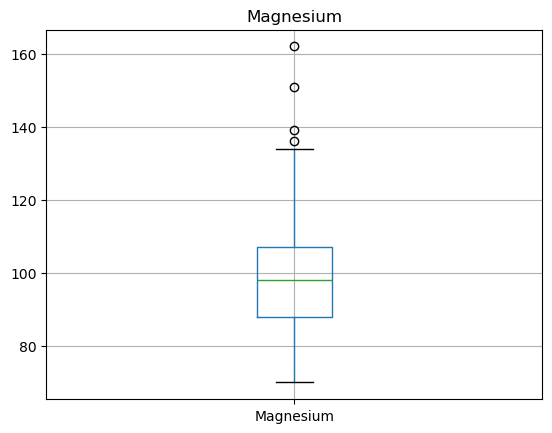

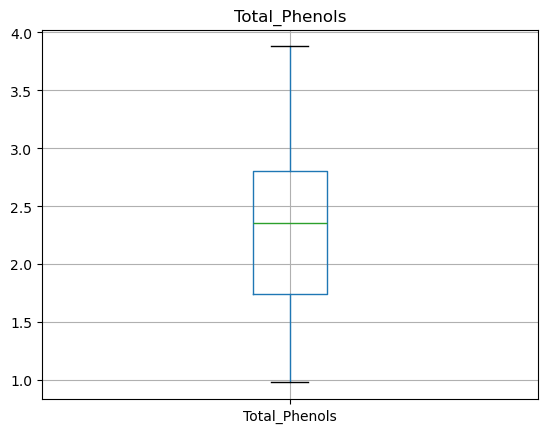

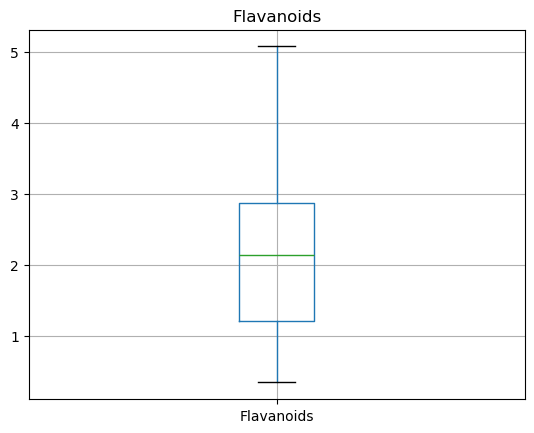

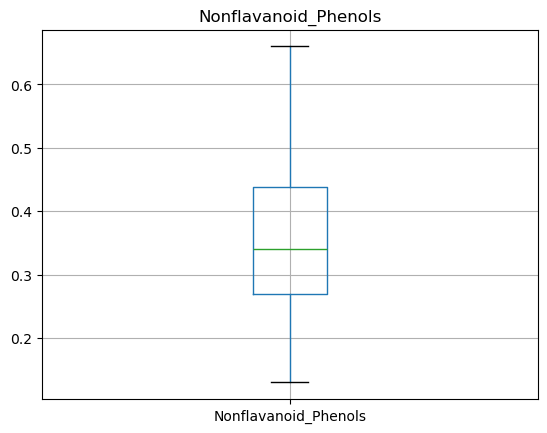

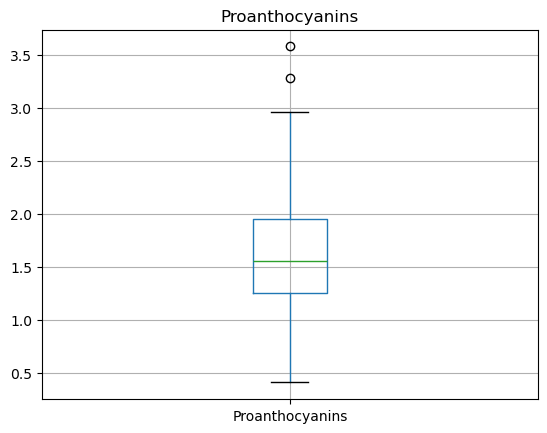

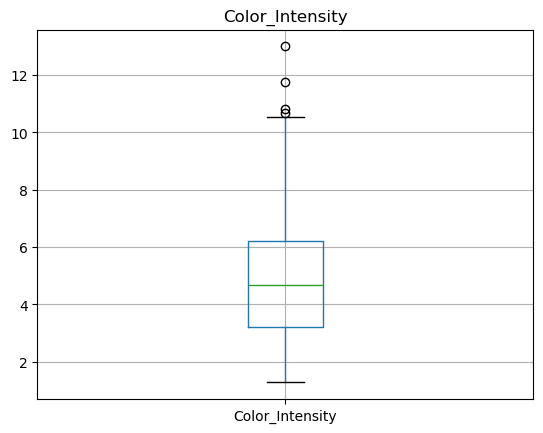

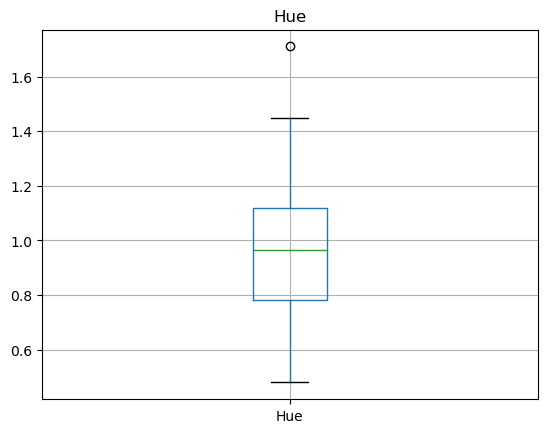

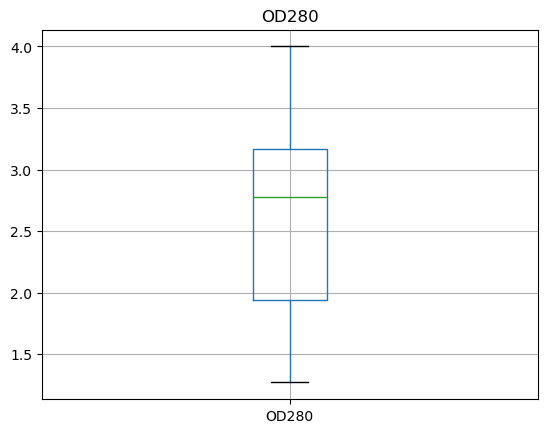

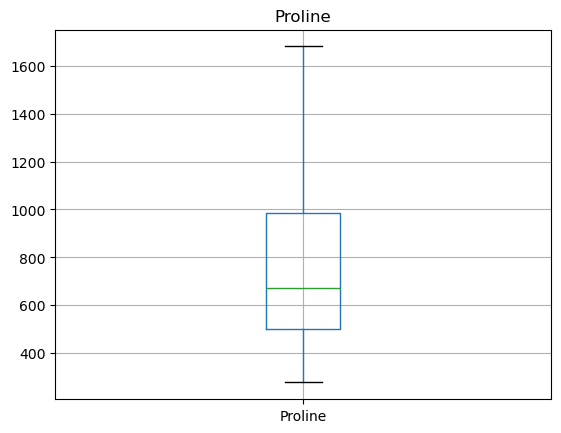

In [11]:
for col in df.columns:
    plt.figure()
    df.boxplot(column = col)
    plt.title(col)
plt.show()

In [12]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Pairplot to examine collinearity or correlation of features.

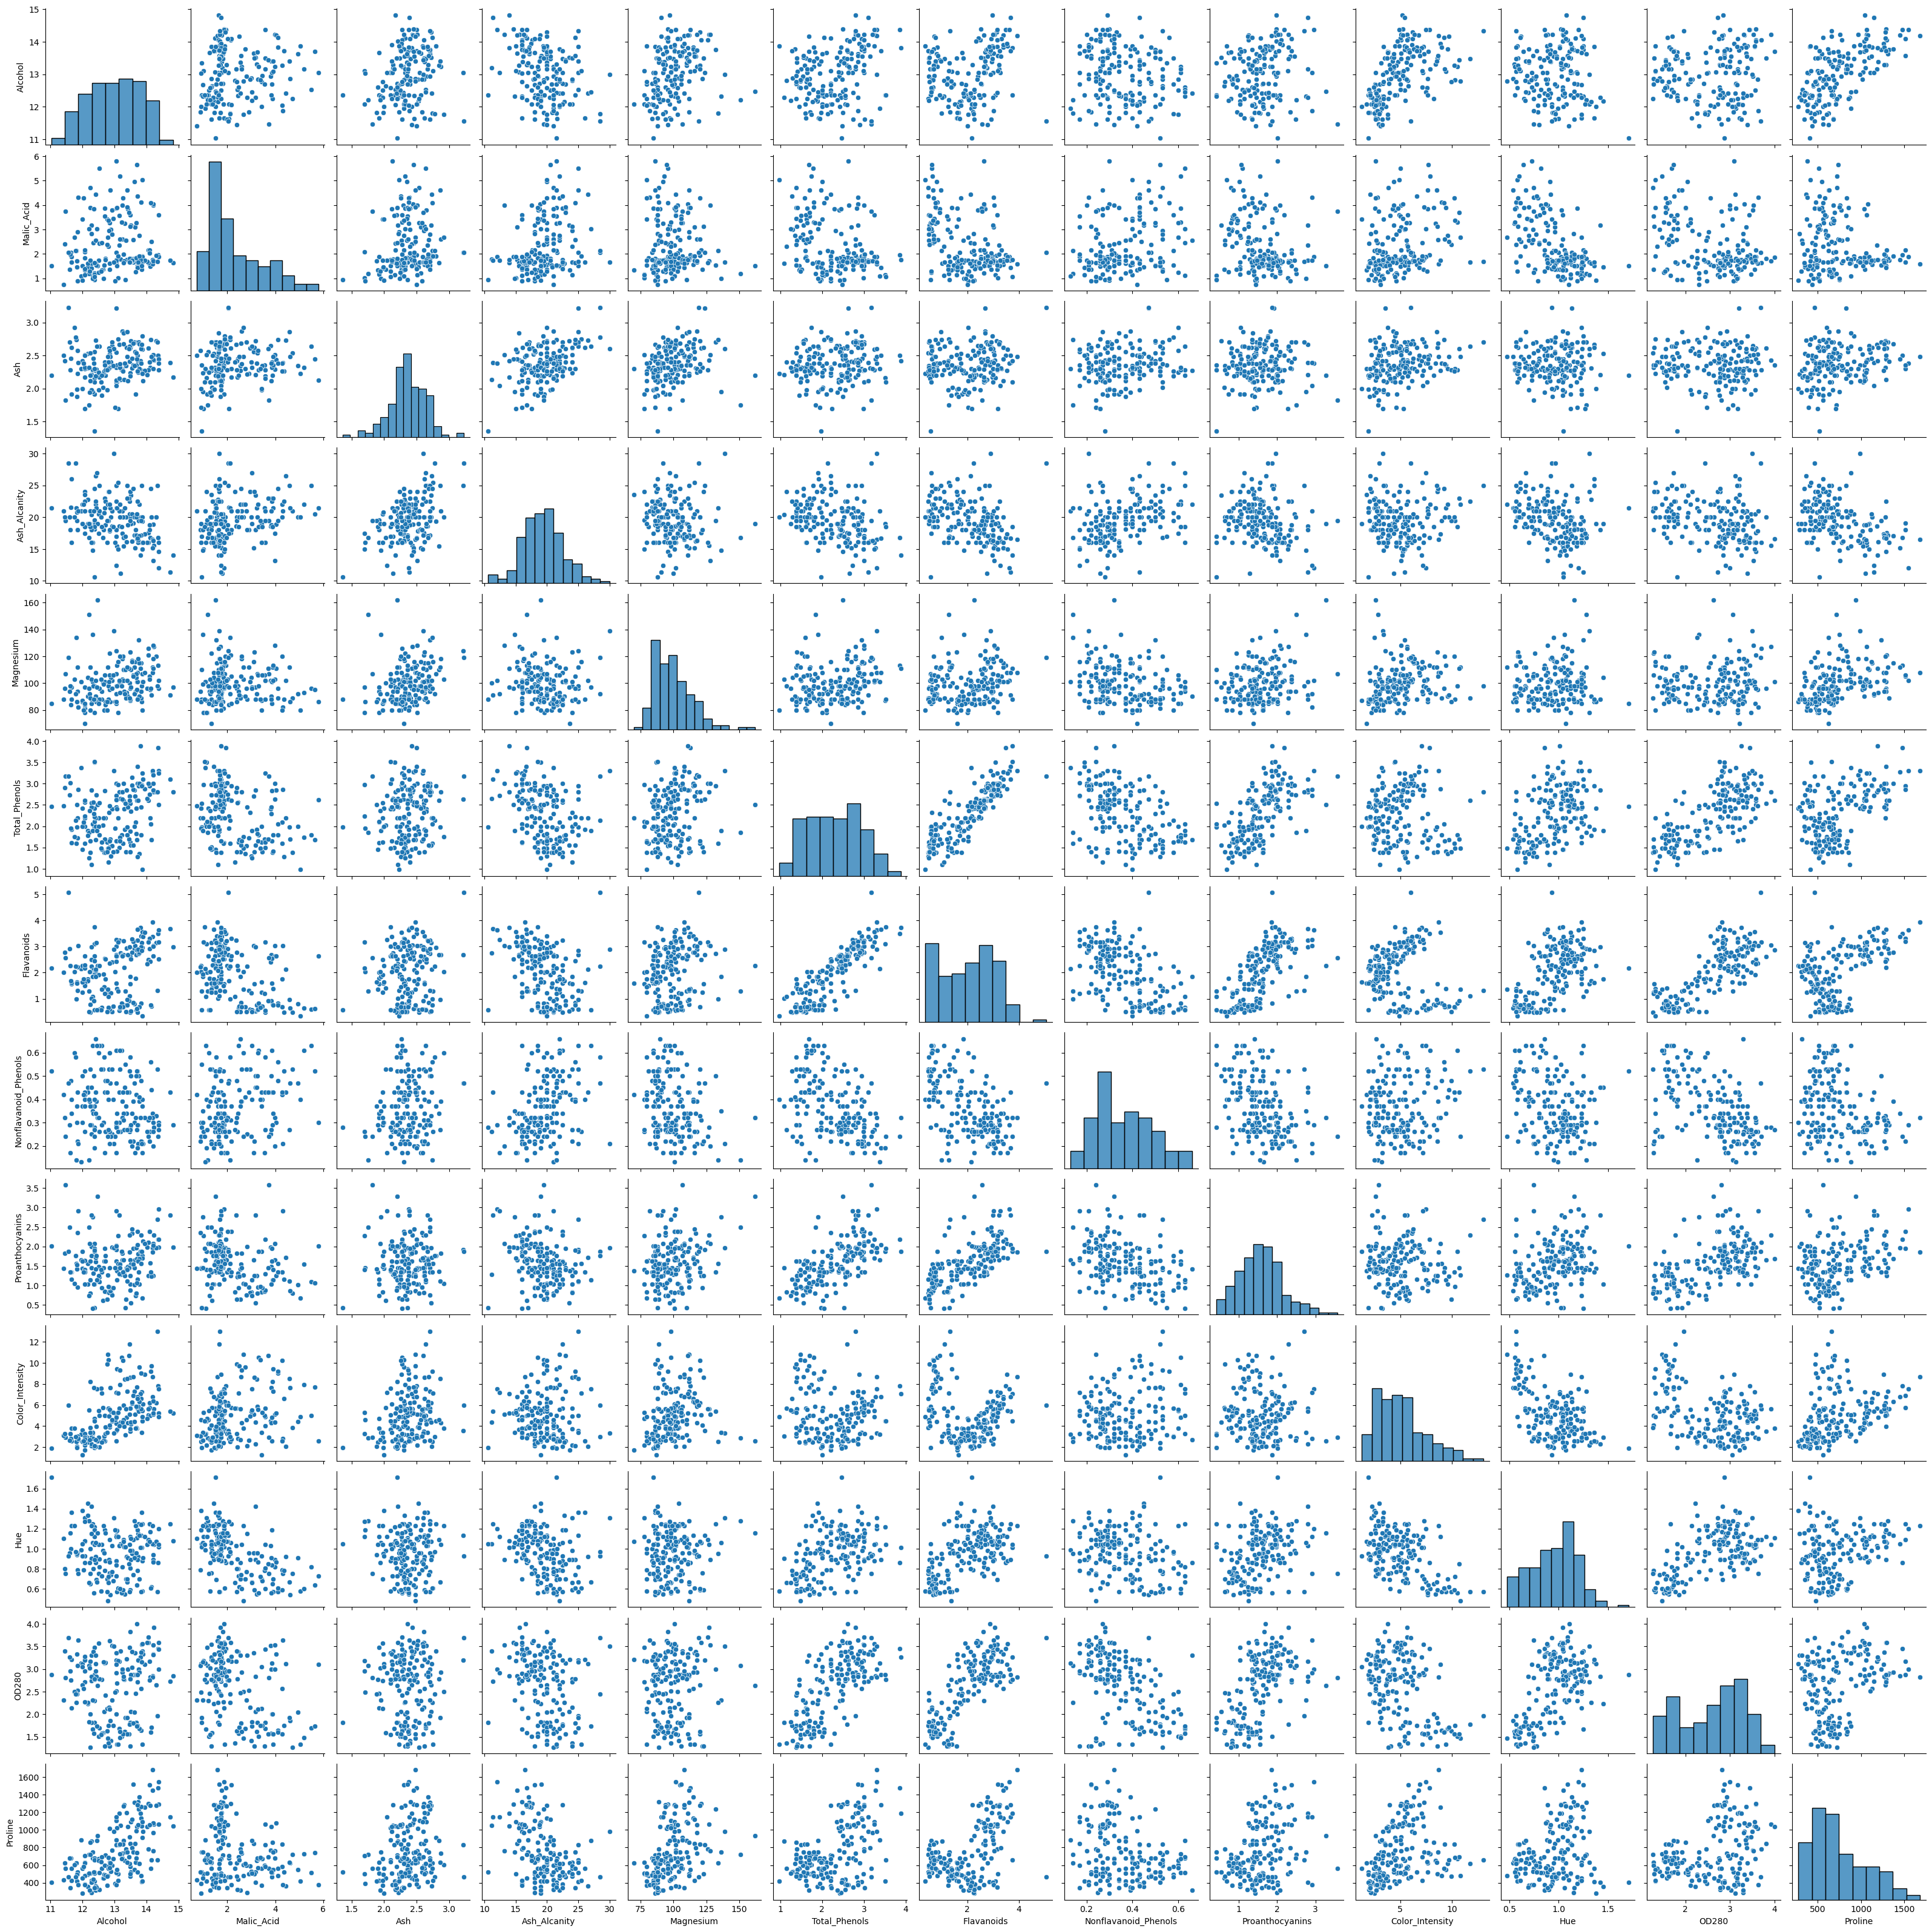

In [14]:
sns.pairplot(df)
plt.show()

Features scaled to prepare for PCA

In [16]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns = df.columns)

In [17]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### PCA(0.8)
Principal component analysis with 80% explained variance esults in 5 components.

In [19]:
model_pca = PCA(0.8)
mypca = model_pca.fit_transform(df_scaled)
explained_variance = model_pca.explained_variance_
total_explained_variance = explained_variance.sum()
explained_variance_ratios = model_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

In [20]:
print(model_pca.fit(df_scaled).explained_variance_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868]


In [21]:
print(model_pca.fit(df_scaled).components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]]


### PCA at 80% Explained Variance

In [23]:
pca_5 = PCA(0.8)
#pca_5 = PCA(n_components = 5)
pca_5.fit(df_scaled)
PCA5_df = pd.DataFrame(pca_5.transform(df_scaled), columns = ['C1', 'C2', 'C3', 'C4', 'C5'])

### KMEANS = 3 Clusters as suggested by plot below.
The number of optimum number of clusters = 3 as the curve bent in the plot below.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Figure 1 SSE vs. Number of Kmeans Clusters


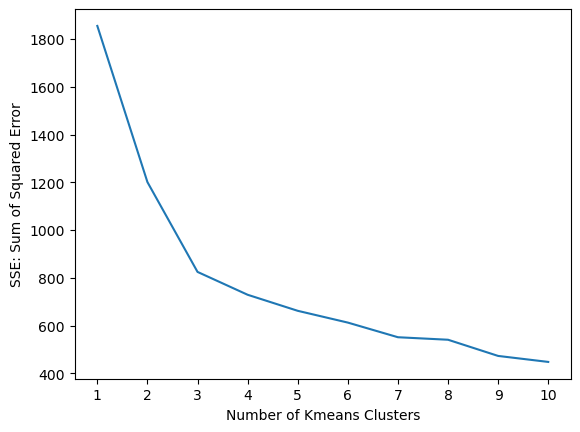

In [25]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA5_df)
    sse.append(kmeans.inertia_)
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Kmeans Clusters")
plt.ylabel("SSE: Sum of Squared Error")
print("Figure 1 SSE vs. Number of Kmeans Clusters")
plt.show()

### KMEANS = 3 fitted with PCA Data

In [27]:
KMean = KMeans(n_clusters = 3,random_state=1)
KMean.fit(PCA5_df)
mykmeans = KMean.predict(PCA5_df)
mykmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

<br>
Silhouette_score

In [29]:
from sklearn.metrics import silhouette_score  
silhouette_score(PCA5_df, KMean.fit_predict(PCA5_df))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.3677292007448991

<br>
Adding predicted mykmeans column to both PCA5_df and original df datasets

In [31]:
PCA5_df['KMeans_Clusters'] = mykmeans
df['KMeans_Clusters'] = mykmeans

In [32]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

### AGGLOMERATIVE WITH 3 CLUSTERS FITTED WITH PCA DATA

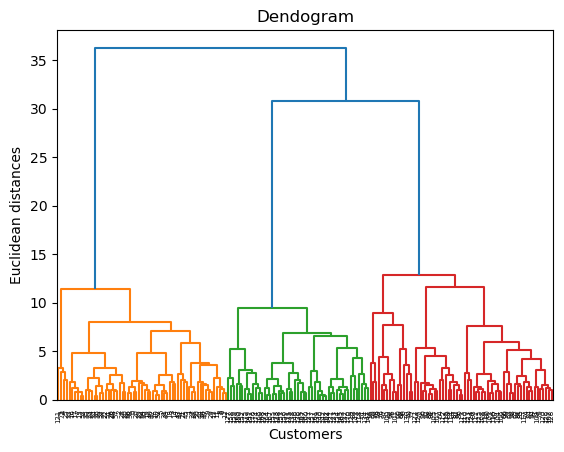

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(PCA5_df, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Agglomerative Clustering method on PCA dataset

In [36]:
#model_AC = AgglomerativeClustering() suggested 3 Clusters at Euclidian distance >15.
model_AC = AgglomerativeClustering(n_clusters = 3)
myAC = model_AC.fit_predict(PCA5_df)
myAC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

Assigning clusters to dataframes.

In [38]:
PCA5_df['AC_Clusters'] = myAC
df['AC_Clusters'] = myAC

In [39]:
from sklearn.metrics import silhouette_score  
silhouette_score(PCA5_df, model_AC.fit_predict(PCA5_df))

0.43009852484282357

### EVALUATION OF MODEL PERFORMANCE

### Cluster Datapoints Distribution (Kmeans cluster #1 is labeled cluster #2 in Agglomerative cluster)

It seems the Kmeans and Agglomerative have identical Distribution)

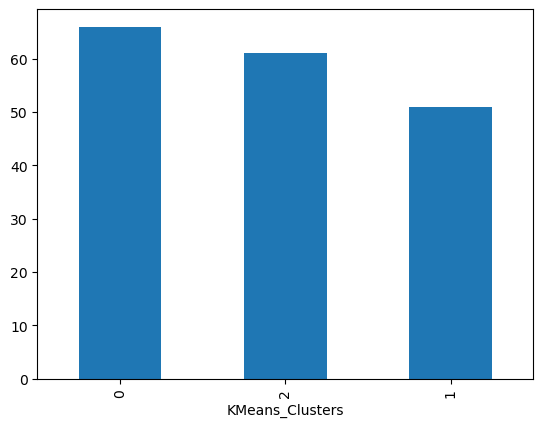

In [43]:
#plot value counts of Kmeans cluster types in descending order
df.KMeans_Clusters.value_counts().plot(kind='bar')
plt.show()

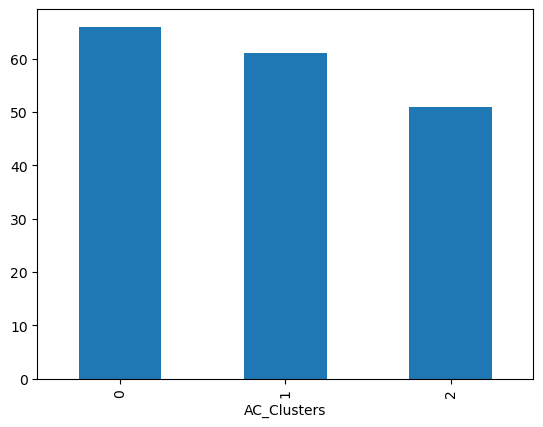

In [44]:
#plot value counts of Agglomerative cluster types in descending order
df.AC_Clusters.value_counts().plot(kind='bar')
plt.show()

It seems counts on cluster types are identical in both Kmeans and Agglomerative clusterings.

In [46]:
counts_df = df['KMeans_Clusters'].value_counts()
counts_df

KMeans_Clusters
0    66
2    61
1    51
Name: count, dtype: int64

In [47]:
counts_df = df['AC_Clusters'].value_counts()
counts_df

AC_Clusters
0    66
1    61
2    51
Name: count, dtype: int64

### Visual Clustering with Kmeans using cluster Medians of boxplots

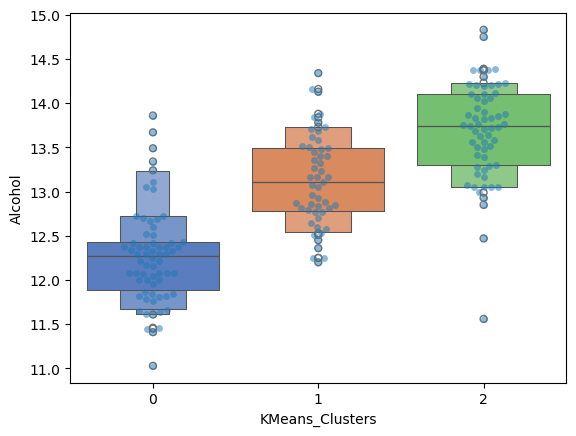

In [49]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Alcohol'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Alcohol'],palette = 'muted')
plt.show()

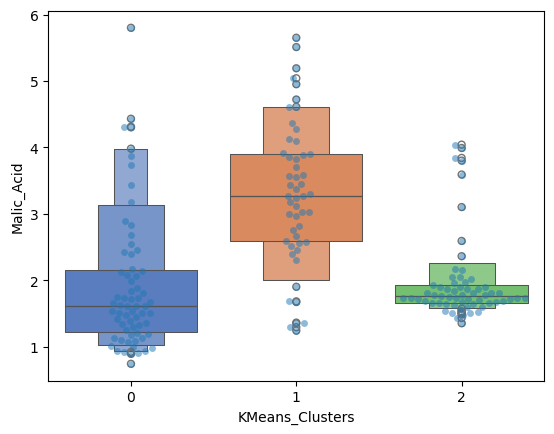

In [50]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Malic_Acid'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Malic_Acid'],palette = 'muted')
plt.show()

Plotting PCA features with assigned clusters

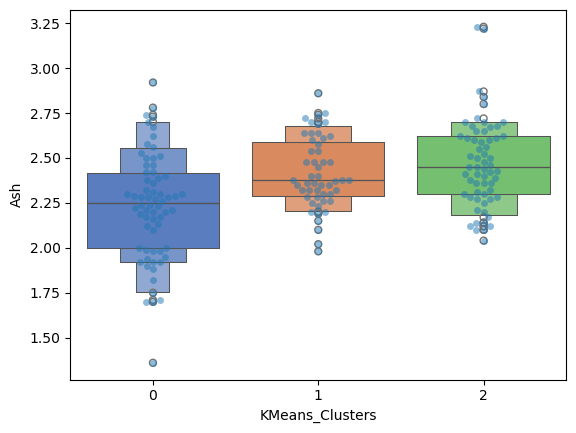

In [52]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Ash'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Ash'],palette = 'muted')
plt.show()

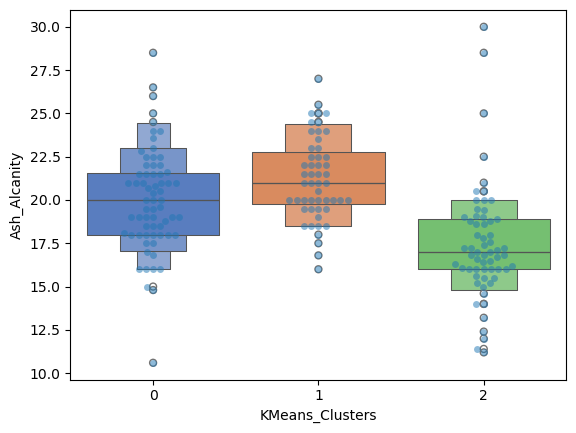

In [53]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Ash_Alcanity'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Ash_Alcanity'],palette = 'muted')
plt.show()

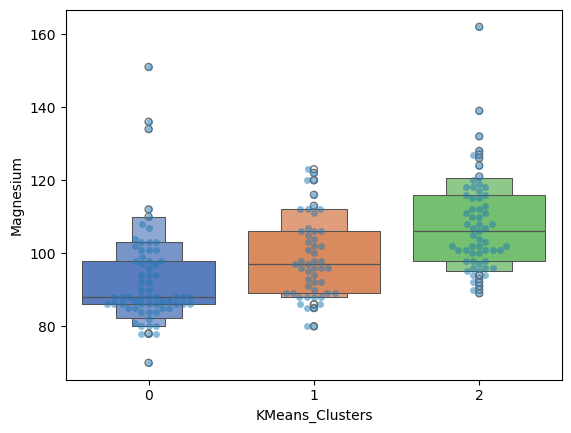

In [54]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Magnesium'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Magnesium'],palette = 'muted')
plt.show()

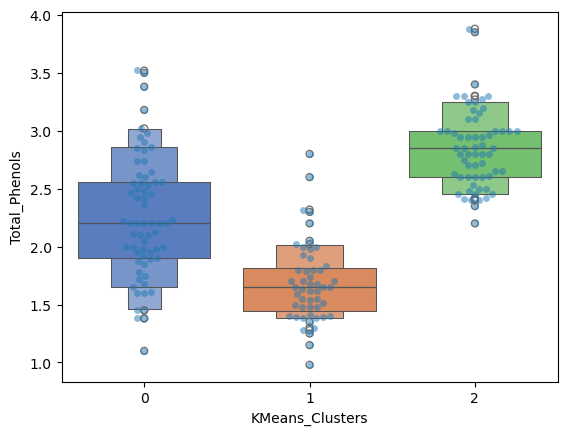

In [55]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Total_Phenols'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Total_Phenols'],palette = 'muted')
plt.show()

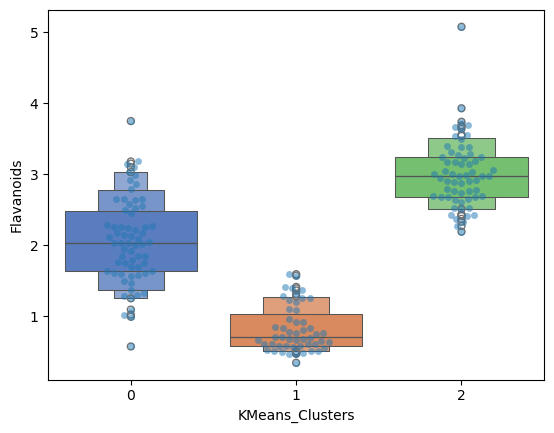

In [56]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Flavanoids'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Flavanoids'],palette = 'muted')
plt.show()

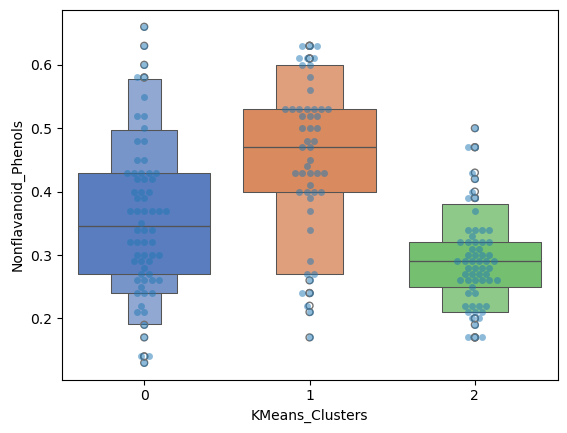

In [57]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Nonflavanoid_Phenols'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Nonflavanoid_Phenols'],palette = 'muted')
plt.show()

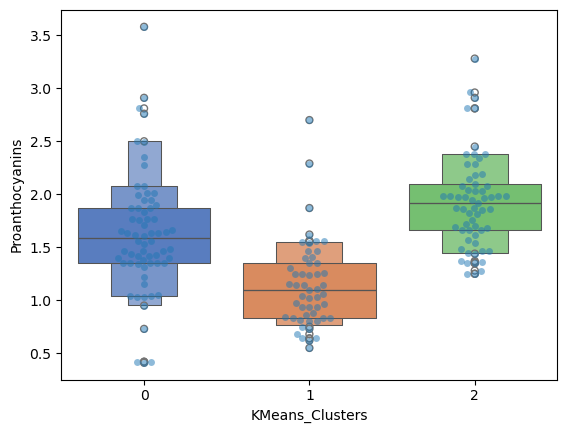

In [58]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Proanthocyanins'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Proanthocyanins'],palette = 'muted')
plt.show()

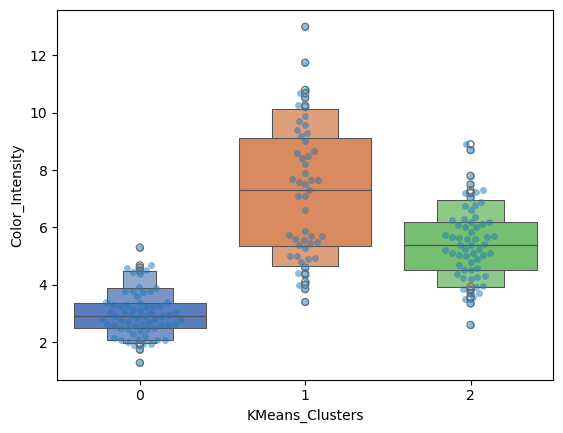

In [59]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Color_Intensity'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Color_Intensity'],palette = 'muted')
plt.show()

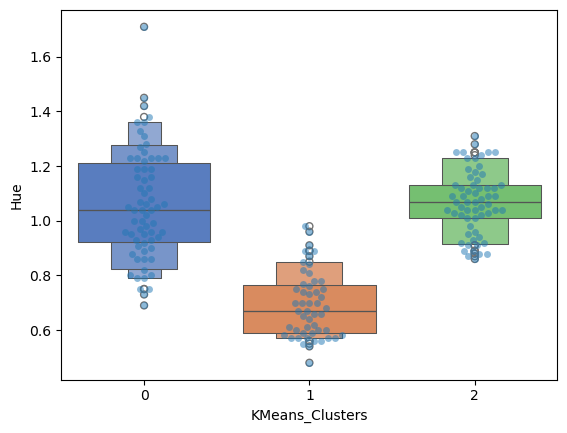

In [60]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Hue'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Hue'],palette = 'muted')
plt.show()

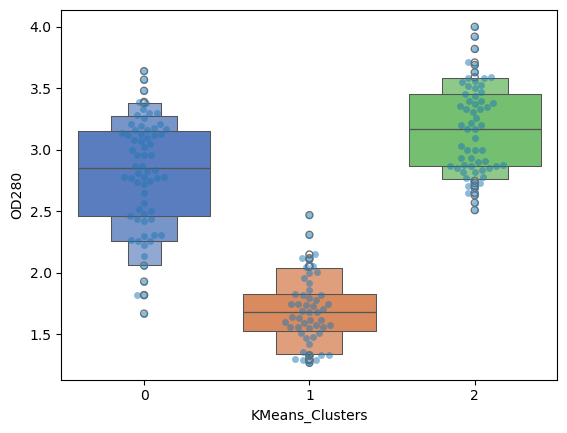

In [61]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['OD280'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['OD280'],palette = 'muted')
plt.show()

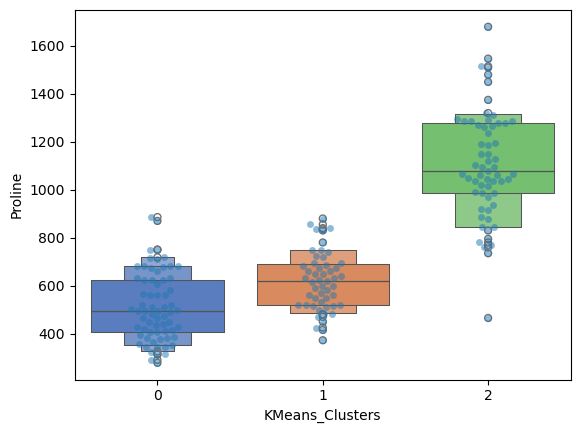

In [62]:
plt.figure()
pl3 = sns.swarmplot(x = df['KMeans_Clusters'], y = df['Proline'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['KMeans_Clusters'], y = df['Proline'],palette = 'muted')
plt.show()

### Visual Clustering with AgglomerativeCluster using cluster Medians of boxplots

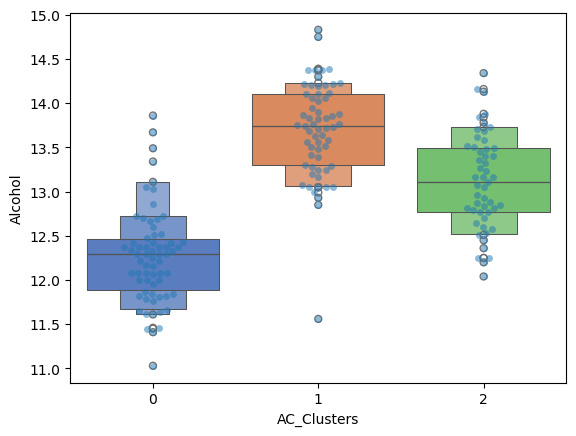

In [64]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Alcohol'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Alcohol'],palette = 'muted')
plt.show()

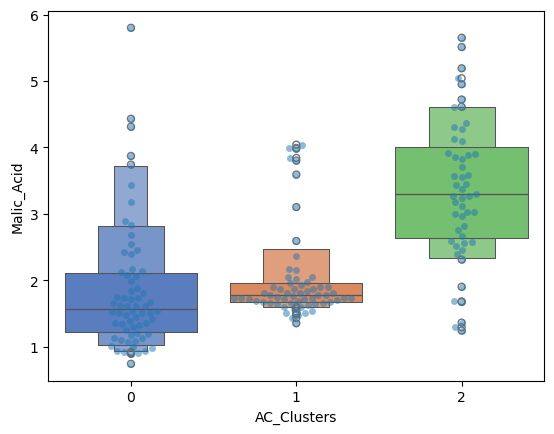

In [65]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Malic_Acid'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Malic_Acid'],palette = 'muted')
plt.show()

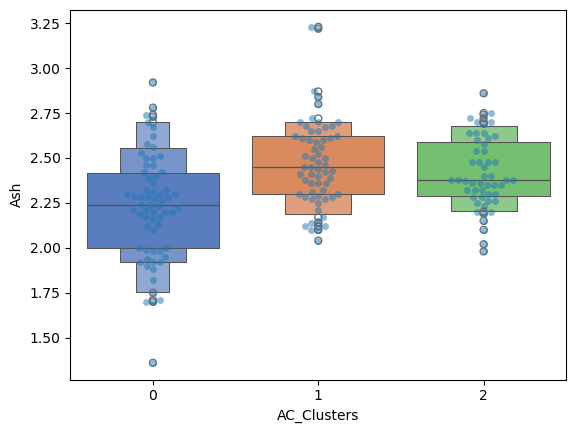

In [66]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Ash'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Ash'],palette = 'muted')
plt.show()

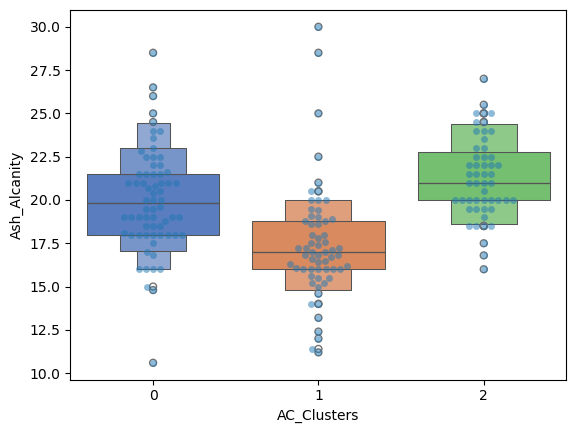

In [67]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Ash_Alcanity'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Ash_Alcanity'],palette = 'muted')
plt.show()

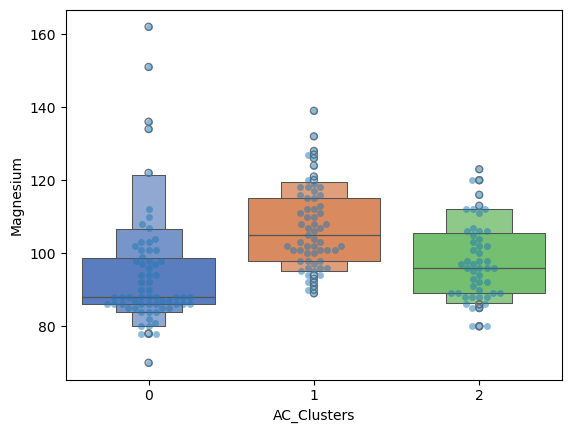

In [68]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Magnesium'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Magnesium'],palette = 'muted')
plt.show()

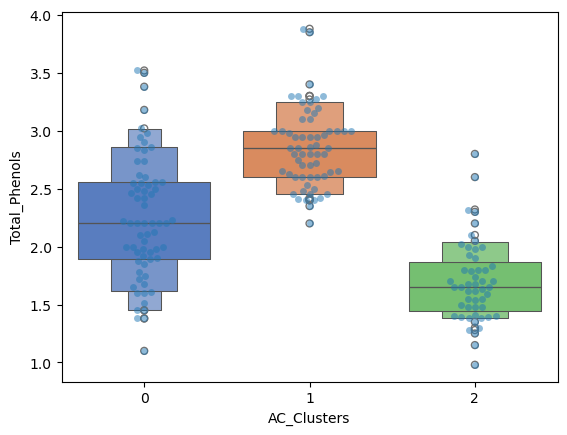

In [69]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Total_Phenols'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Total_Phenols'],palette = 'muted')
plt.show()

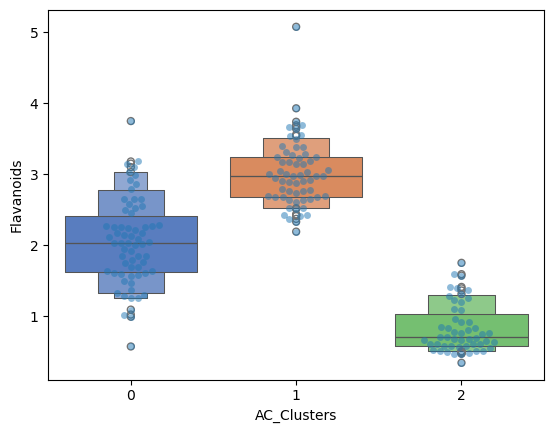

In [70]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Flavanoids'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Flavanoids'], palette = 'muted')
plt.show()

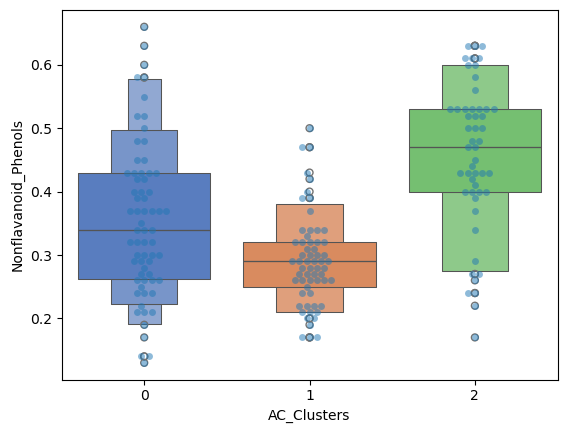

In [71]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Nonflavanoid_Phenols'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Nonflavanoid_Phenols'], palette = 'muted')
plt.show()

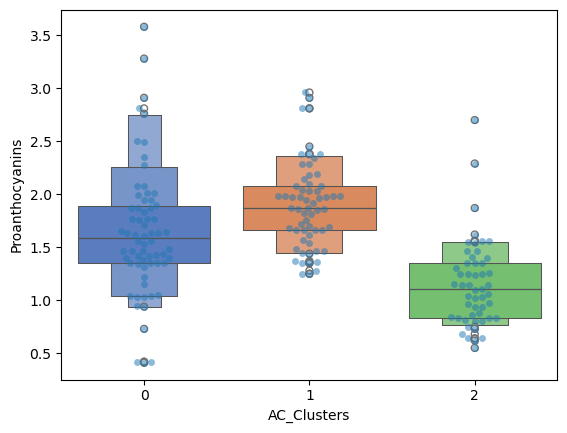

In [72]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Proanthocyanins'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Proanthocyanins'], palette = 'muted')
plt.show()

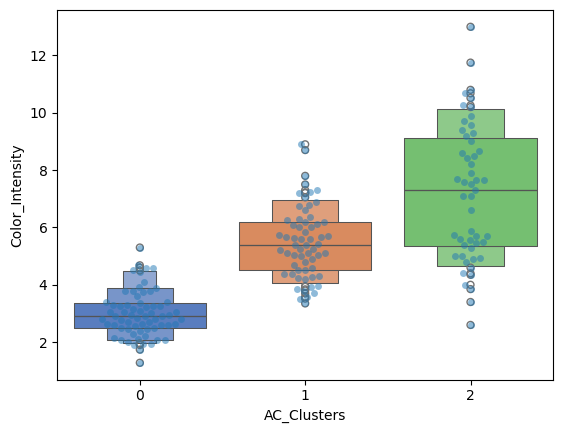

In [73]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Color_Intensity'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Color_Intensity'], palette = 'muted')
plt.show()

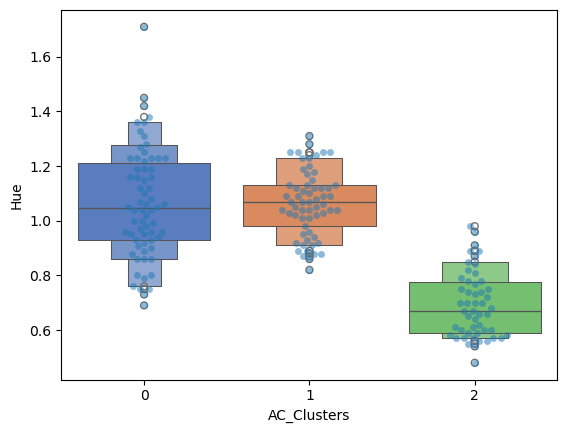

In [74]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Hue'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Hue'], palette = 'muted')
plt.show()

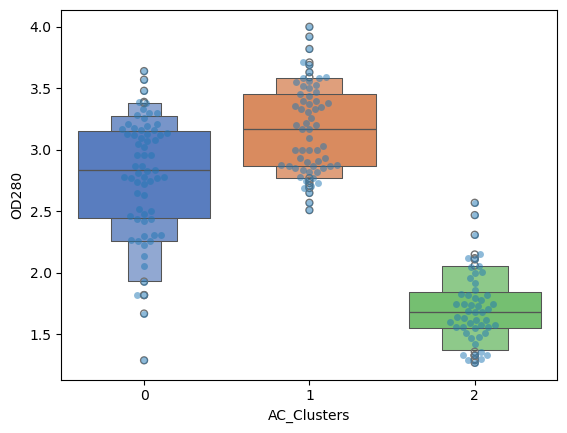

In [75]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['OD280'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['OD280'], palette = 'muted')
plt.show()

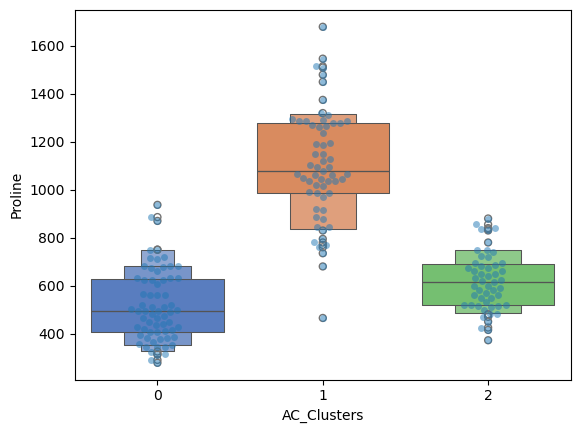

In [76]:
plt.figure()
pl3 = sns.swarmplot(x = df['AC_Clusters'], y = df['Proline'], alpha = 0.5)
pl3 = sns.boxenplot(x = df['AC_Clusters'], y = df['Proline'], palette = 'muted')
plt.show()

### Conclusion
PCA(.8) results in 5 components while Kmeans optimized with Elbow method to have 3 clusters, the same number as in Hierarchial AgglomerativeClustering. 

Attempts have been made to use the Medians of all 12 Wine Features to describe each cluster type with Kmeans and Agglomerative as clustering methods.

As seen from the table belo, Kmeans Clustering classified the wines dataset into three separate clusters which are very similar to the three clusters predicted by the Hierarchial AgglomerativeClustering method with the latter having better silhouette_score 0.43 vs. 0.37 (silhouette score is used to tell the separation distance between the resulting clusters). Notice that cluster_1 in Kmeans is labeled as cluster_2 in AgglomerativeClustering and vice versa when reading the table below.
<br>
<br>
Below are some observations in regarding to each cluster.
<br>

1. KmeansClustering

Cluster 0:

Wines cluster 0 have the lowest alcohol content and lowest proline which results in thinner, lighter wines.

Cluster 1:

Cluster 1 wines appear to be moderate in alcohol but highest in Malic acid resulting in aggressively sour and tart taste.

Cluster 2:

Cluster 2 wines seem to be more full-bodied than other two clusters, they are strongest in alcohol, high in flavonoids, moderate in Malic_Acid, and low in Ash_Alcanity, Nonflanoid_Phenols.
 
<br>
2. AgglomerativeClustering
<br>
Cluster 0:

Wines cluster 0 have the lowest alcohol content and lowest proline which results in thinner, lighter wines.



Cluster 1:

Cluster 1 wines seem to be more full-bodied than other two clusters, they are strongest in alcohol, high in flavonoids, moderate in Malic_Acid, and low in Ash_Alcanity, Nonflanoid_Phenols.
 

Cluster 2:

Cluster 2 wines appear to be moderate in alcohol but highest in Malic acid resulting in aggressively sour and tart taste. 
  

<br>
<br>
 Table 1 Boxplot Summary of 3-Clusters Median Comparison using Kmeans and HierarchialClustering
 (Notice that cluster_1 in Kmeans is labeled as cluster_2 in AgglomerativeClustering and vice versa)
 
 ***For a Feature, High = largest median of the 3 clusters, Low = smallest median, Moderate = middle between High and Low.


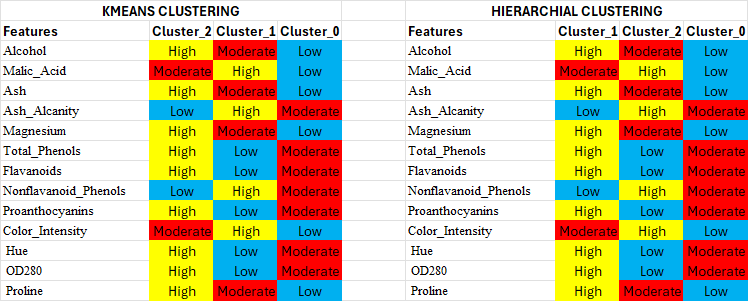.
